In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

# Reading the Life Expectancy Data
life_expect_data = pd.read_csv('/Users/shlokshah/Spring_21_Semester/XInformatics/Project/life-expectancy_2019.csv')

life_expect_data.head()

# Deleting the data which is not required i.e. for Years before 2000 and after 2015

index_list = life_expect_data[(life_expect_data.Year >=1) & (life_expect_data.Year <=1999) |
                              (life_expect_data.Year >2015)].index.tolist()
life_expect_data = life_expect_data.drop(index_list)

life_expect_data = life_expect_data.drop('Code', axis=1)
life_expect_data

,Entity,Year,Life expectancy
50,Afghanistan,2000,55.841
51,Afghanistan,2001,56.308
52,Afghanistan,2002,56.784
53,Afghanistan,2003,57.271
54,Afghanistan,2004,57.772
...,...,...,...
19019,Zimbabwe,2011,52.896
19020,Zimbabwe,2012,55.032
19021,Zimbabwe,2013,56.897
19022,Zimbabwe,2014,58.410


In [2]:
# Finding Countries in Common with the dataset

countries_in_focus = ['India',
 'Nigeria',
 'Pakistan',
 'China',
 'Democratic Republic of the Congo',
 'Ethiopia',
 'Bangladesh',
 'Indonesia',
 'United Republic of Tanzania',
 'Angola',
 'Uganda',
 'Mozambique',
 'Afghanistan',
 'Niger',
 'Sudan',
 'Mali',
 'Kenya',
 'Côte d\'Ivoire',
 'Cameroon',
 'Somalia',
 'Burkina Faso',
 'Chad',
 'Philippines',
 'Myanmar',
 'South Africa',
 'Brazil',
 'Egypt',
 'Ghana',
 'Malawi',
 'Yemen',
 'Zambia',
 'Madagascar',
 'Guinea',
 'Mexico',
 'South Sudan',
 'Sierra Leone',
 'Benin',
 'Zimbabwe',
 'Iraq',
 'Nepal',
 'Senegal',
 'Viet Nam',
 'Burundi',
 'United States of America',
 'Turkey',
 'Rwanda',
 'Iran (Islamic Republic of)',
 'Central African Republic',
 'Haiti',
 'Uzbekistan']

countries_in_focus = sorted(countries_in_focus)

In [3]:
cn = life_expect_data['Entity']

def intersection(l1, l2):
    return list(set(l1) & set(l2))

common_countries = sorted(intersection(countries_in_focus, cn))
print(len(common_countries))
print(common_countries)

#"Côte d'Ivoire" ---> Cote d'Ivoire

49
['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Brazil', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'China', 'Democratic Republic of the Congo', 'Egypt', 'Ethiopia', 'Ghana', 'Guinea', 'Haiti', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Kenya', 'Madagascar', 'Malawi', 'Mali', 'Mexico', 'Mozambique', 'Myanmar', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Turkey', 'Uganda', 'United Republic of Tanzania', 'United States of America', 'Uzbekistan', 'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe']


In [4]:
le_data_filtered = life_expect_data[life_expect_data['Entity'].isin(common_countries)]
le_data_filtered.shape

(784, 3)

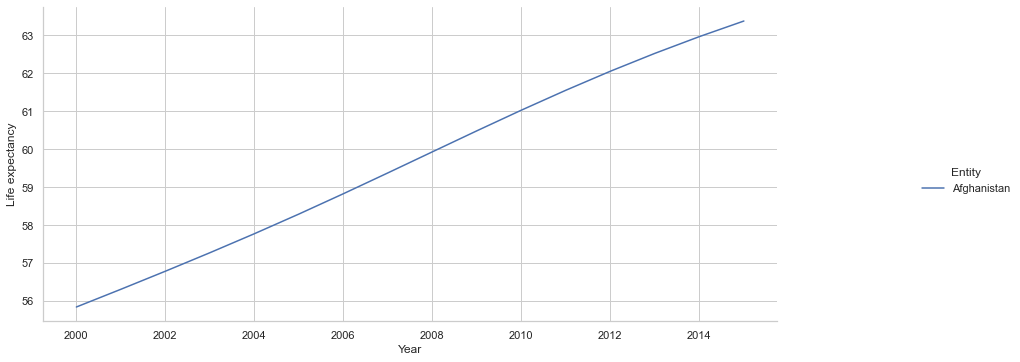

In [5]:
test = le_data_filtered[le_data_filtered['Entity'] == 'Afghanistan']
test

g = sns.relplot(x = 'Year', y = 'Life expectancy', hue = 'Entity', kind = "line", data = test)
g.fig.set_size_inches(15,5)
plt.show()

In [6]:
# Plotting the cleaned data

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])

values

#sns.lineplot(data=data, palette="tab10", linewidth=2.5)

array([[  0.16792113,   0.52350518,   0.81737553,   1.70384552],
       [ -1.97902642,   1.23770369,   0.05723019,   2.74326736],
       [ -2.94547836,   1.09402466,   1.62835461,   2.35998788],
       ...,
       [-20.16215347,   9.46658006, -10.38886875,  17.95576784],
       [-20.32296367,   9.63655141,  -7.97732518,  19.39724181],
       [-20.76771621,  11.01141408,  -7.94147579,  19.35811172]])

/Users/shlokshah/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/shlokshah/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


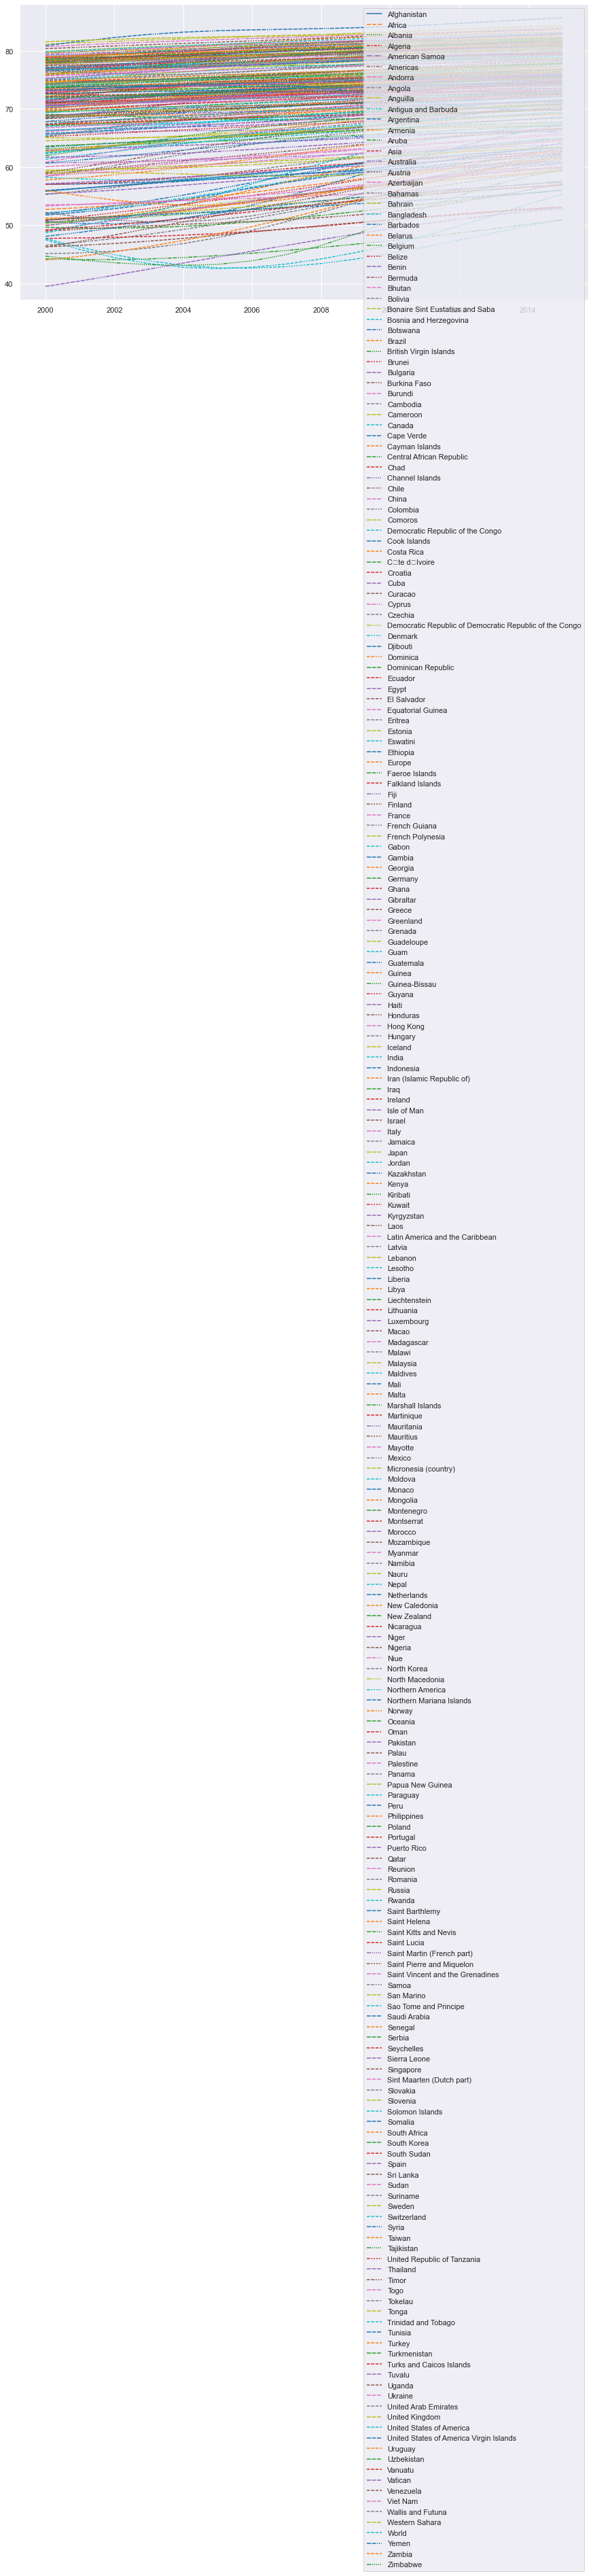

In [7]:
import seaborn as sb

# Plotting the cleaned data
sb.set_theme(style="whitegrid")


countries = life_expect_data.Entity.unique().tolist()
years = life_expect_data.Year.unique().tolist()

values = []

for year in years:
    values_for_year = life_expect_data.loc[(life_expect_data.Year == year)]['Life expectancy'].tolist()
    values.append(values_for_year)


data = pd.DataFrame(values, years, columns=countries)

data

sns.set(rc={'figure.figsize':(15,8)})

graph = sns.lineplot(data=data, palette="tab10")

In [8]:
# Whole World Data for Child Mortality

child_mortality = pd.read_excel(r'wholeworld_cmi.xlsx')
df_child_mortality = pd.DataFrame(data = child_mortality)
df_child_mortality.head(10)

,Location,Dim2,Indicator,Period,Dim1,Tooltip,IndicatorCode,FactValueForMeasure,FactValueString,FactValueUoM,...,FactValueNumericPrefix,DateModified,ClassBreakId,LegendLabelText,LegendColorForText,LegendColorMaxNumeric,LegendColorMinNumeric,BasemapURL,LabelMapURL,LabelMapLanguage
0,Afghanistan,HIV/AIDS,Number of deaths,2017,0-27 days,0.17,MORT_100,0.17,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,HIV/AIDS,Number of deaths,2017,1-59 months,16.83,MORT_100,16.83,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,HIV/AIDS,Number of deaths,2017,0-4 years,17.00,MORT_100,17.00,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,HIV/AIDS,Number of deaths,2016,0-27 days,0.17,MORT_100,0.17,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,HIV/AIDS,Number of deaths,2016,1-59 months,16.83,MORT_100,16.83,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,HIV/AIDS,Number of deaths,2016,0-4 years,17.00,MORT_100,17.00,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,HIV/AIDS,Number of deaths,2015,0-27 days,0.17,MORT_100,0.17,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,HIV/AIDS,Number of deaths,2015,1-59 months,16.83,MORT_100,16.83,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,HIV/AIDS,Number of deaths,2015,0-4 years,17.00,MORT_100,17.00,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,HIV/AIDS,Number of deaths,2014,0-27 days,0.17,MORT_100,0.17,NaN,NaN,...,NaN,2018-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Dropping the columns with redundant and NAN Values
df_child_mortality = df_child_mortality.drop(columns=['FactValueString','FactValueUoM','FactComments','DataSourceDimValueCode','Dim3ValueCode',
                                 'SlicingDimCode','SlicingDimValueCode','LanguageName',
                                 'FactValueNumericPrefix','DateModified','ClassBreakId','LegendLabelText','LegendColorForText', 
                                 'LegendColorMaxNumeric','LegendColorMinNumeric','BasemapURL','LabelMapURL','LabelMapLanguage',
                                 'IsLatestYear','LatestYearLabel','Dim2ValueCode','SpatialDimValueCode','LanguageOrder',
                                 'TimeDimValueCode','Dim1ValueCode','FactValueForMeasure','Indicator','IndicatorCode'])

df_child_mortality = df_child_mortality.drop(df_child_mortality.columns[5], axis=1) #Cleaning the unwanted column
df_child_mortality = df_child_mortality.rename(columns={"Dim2": "Reason", "Dim1": "AgeGroup", "Period": "Year","Tooltip" : "Deaths"}, errors="raise")

print(df_child_mortality.shape)
df_child_mortality.describe()

(147762, 6)


,Year,Deaths
count,147762.000000,147762.000000
mean,2008.486397,1830.014304
std,5.183150,11319.173549
min,2000.000000,0.000000
25%,2004.000000,0.028000
50%,2008.000000,24.320000
75%,2013.000000,477.400000
max,2017.000000,487137.000000


In [10]:
new_df = df_child_mortality

x = new_df.groupby("Location").sum()
x = x.sort_values(by='Deaths', ascending=False)

list_countries = x.index.tolist()
list_countries = list_countries[0:50]

In [11]:
dataset_final = new_df[new_df.Location.isin(list_countries)]
print(dataset_final)

           Location    Reason  Year     AgeGroup   Deaths SpaceTime
0       Afghanistan  HIV/AIDS  2017    0-27 days     0.17       AFG
1       Afghanistan  HIV/AIDS  2017  1-59 months    16.83       AFG
2       Afghanistan  HIV/AIDS  2017    0-4 years    17.00       AFG
3       Afghanistan  HIV/AIDS  2016    0-27 days     0.17       AFG
4       Afghanistan  HIV/AIDS  2016  1-59 months    16.83       AFG
...             ...       ...   ...          ...      ...       ...
147757     Zimbabwe  Injuries  2001  1-59 months  1030.00       ZWE
147758     Zimbabwe  Injuries  2001    0-4 years  1106.00       ZWE
147759     Zimbabwe  Injuries  2000    0-27 days    72.03       ZWE
147760     Zimbabwe  Injuries  2000  1-59 months   957.80       ZWE
147761     Zimbabwe  Injuries  2000    0-4 years  1030.00       ZWE

[38060 rows x 6 columns]


In [12]:
dataset_final = dataset_final[dataset_final.AgeGroup =='0-4 years']
grouped_cmi = dataset_final.groupby(['Location','Year'], as_index=False).sum()
grouped_cmi.head(10)

,Location,Year,Deaths
0,Afghanistan,2000,126578.92
1,Afghanistan,2001,131386.92
2,Afghanistan,2002,124658.00
3,Afghanistan,2003,117839.10
4,Afghanistan,2004,117196.50
5,Afghanistan,2005,117360.00
6,Afghanistan,2006,120168.00
7,Afghanistan,2007,112389.00
8,Afghanistan,2008,109295.00
9,Afghanistan,2009,108029.00


In [13]:
le_data_filtered = le_data_filtered.rename(columns={'Entity': 'Location'})
le_data_filtered

,Location,Year,Life expectancy
50,Afghanistan,2000,55.841
51,Afghanistan,2001,56.308
52,Afghanistan,2002,56.784
53,Afghanistan,2003,57.271
54,Afghanistan,2004,57.772
...,...,...,...
19019,Zimbabwe,2011,52.896
19020,Zimbabwe,2012,55.032
19021,Zimbabwe,2013,56.897
19022,Zimbabwe,2014,58.410


In [14]:
cmi_life_expect = pd.merge(grouped_cmi, le_data_filtered, how = 'inner', on = ['Location', 'Year'], suffixes=('_left', '_right'))
print(cmi_life_expect)

        Location  Year     Deaths  Life expectancy
0    Afghanistan  2000  126578.92           55.841
1    Afghanistan  2001  131386.92           56.308
2    Afghanistan  2002  124658.00           56.784
3    Afghanistan  2003  117839.10           57.271
4    Afghanistan  2004  117196.50           57.772
..           ...   ...        ...              ...
779     Zimbabwe  2011   41041.50           52.896
780     Zimbabwe  2012   38051.22           55.032
781     Zimbabwe  2013   34633.40           56.897
782     Zimbabwe  2014   32113.40           58.410
783     Zimbabwe  2015   30271.40           59.534

[784 rows x 4 columns]


In [15]:
cmi_life_expect.to_excel('cmi_le_data.xlsx')

In [22]:
new_cmi_le_afg = cmi_life_expect[cmi_life_expect.Location == 'Afghanistan']
new_cmi_le_afg

,Location,Year,Deaths,Life expectancy
0,Afghanistan,2000,126578.92,55.841
1,Afghanistan,2001,131386.92,56.308
2,Afghanistan,2002,124658.00,56.784
3,Afghanistan,2003,117839.10,57.271
4,Afghanistan,2004,117196.50,57.772
5,Afghanistan,2005,117360.00,58.290
6,Afghanistan,2006,120168.00,58.826
7,Afghanistan,2007,112389.00,59.375
8,Afghanistan,2008,109295.00,59.930
9,Afghanistan,2009,108029.00,60.484


In [23]:
import sklearn.metrics as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

# Split the data to apply ML models for predicting the number of Deaths

x,y = new_cmi_le_afg[['Life expectancy', 'Year']], new_cmi_le_afg.Deaths;

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=56)

print(X_train, y_train)
print(X_test, y_test)

    Life expectancy  Year
12           62.054  2012
1            56.308  2001
14           62.966  2014
6            58.826  2006
7            59.375  2007
9            60.484  2009
10           61.028  2010
11           61.553  2011
2            56.784  2002
0            55.841  2000
4            57.772  2004
5            58.290  2005 12     95248.00
1     131386.92
14     85306.30
6     120168.00
7     112389.00
9     108029.00
10    102919.00
11     99331.00
2     124658.00
0     126578.92
4     117196.50
5     117360.00
Name: Deaths, dtype: float64
    Life expectancy  Year
8            59.930  2008
13           62.525  2013
15           63.377  2015
3            57.271  2003 8     109295.0
13     89519.4
15     82957.0
3     117839.1
Name: Deaths, dtype: float64


In [24]:
# Apply Decision Tree & AdaBoost Regressor

regressor = DecisionTreeRegressor(max_depth = 3, criterion = "friedman_mse", random_state = 0) 
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3, criterion = "friedman_mse"),
                           n_estimators=72, random_state=0)

# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                       max_depth=3),
                  n_estimators=72, random_state=0)

In [25]:
y_pred = regressor.predict(X_test)

# Results of Decision Tree Regressor
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 4118.82
Mean squared error = 19834913.83
Median absolute error = 3653.55
Explain variance score = 0.92
R2 score = 0.9
